# Using Natural Language Processing to Predict Upvotes in Hacker News

Natural Language Processing (NLP) is the study of enabling computers to understand human languages e.g. teaching computers to score essays, infer grammatical rules, or determine emotions associated with text

In this project, we will learn the building blocks of NLP. In order for a computer to begin making inferences from text, we convert the text to a numerical representation.

We will explore how to get from written text to a numerical representation, and how we can use that representation to make predictions

## Introduction To The Dataset

Hacker News is a community where users submit articles, and other users can upvote those articles (the most upvotes make it to the front page)

The data consists of submissions made to Hacker News from 2006 to 2015, and 3000 rows are sampled randomly. Our data only has four columns:

- submission_time - When the article was submitted
- upvotes - The number of upvotes the article received
- url - The base URL of the article
- headline - The article's headline

We will predict the number of upvotes the articles received, based on their headlines. Because upvotes are an indicator of popularity, we'll discover which types of articles tend to be the most popular.

In [2]:
import pandas as pd
submissions = pd.read_csv(r"C:\projectdatasets\sel_hn_stories.csv")
submissions.columns = ["submission_time", "upvotes", "url", "headline"]
submissions = submissions.dropna()

submissions.head(10)

,submission_time,upvotes,url,headline
0,2010-02-17T16:57:59Z,1,blog.jonasbandi.net,Software: Sadly we did adopt from the construc...
1,2014-02-04T02:36:30Z,1,blogs.wsj.com,Google’s Stock Split Means More Control for L...
2,2011-10-26T07:11:29Z,1,threatpost.com,SSL DOS attack tool released exploiting negoti...
3,2011-04-03T15:43:44Z,67,algorithm.com.au,Immutability and Blocks Lambdas and Closures
4,2013-01-13T16:49:20Z,1,winmacsofts.com,Comment optimiser la vitesse de Wordpress?
5,2013-09-04T12:10:52Z,1,theincidentaleconomist.com,ilk is not as good for you as you think
6,2012-03-09T20:25:42Z,1,worldometers.info,Worldometers - Real time world statistics
7,2010-04-22T13:23:10Z,26,docs.com,icrosoft strikes back: introduces docs for fac...
8,2012-05-06T16:08:46Z,2,blog.hackplanet.in,Net HTTP status codes
9,2014-12-23T00:55:31.000Z,1,curt-rice.com,Anecdata or how McKinsey’s story became Sheryl...


We want to train a linear regression algorithm that predicts the number of upvotes a headline would receive. To do this, we need to convert each headline to a numerical representation

We will use a 'bag of words model', which represents each piece of text as a numerical vector.

Below is a high-level diagram showing how two sentences convert to a bag of words


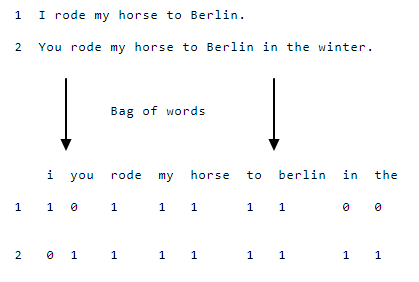

The first step in creating a bag of words model is tokenization. In tokenization, we break a sentence up into disconnected words.

Below is a diagram in which we tokenize the two sentences above. We are splitting each sentence into a list of individual words, or tokens. The split occurs on the space character (" ").

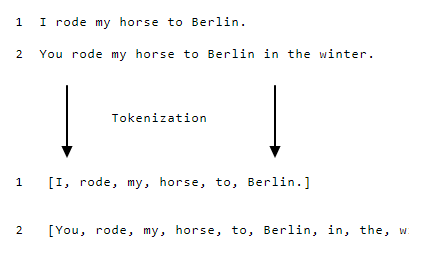

We will split each headline from our data into individual words on the space character(" "), and append the resulting list to 'tokenized_headlines'

In [3]:
tokenized_headlines = []
for item in submissions["headline"]:
    tokenized_headlines.append(item.split())

In [4]:
tokenized_headlines[0:5]

[['Software:',
  'Sadly',
  'we',
  'did',
  'adopt',
  'from',
  'the',
  'construction',
  'analogy'],
 ['Google’s',
  'Stock',
  'Split',
  'Means',
  'More',
  'Control',
  'for',
  'Larry',
  'and',
  'Sergey'],
 ['SSL',
  'DOS',
  'attack',
  'tool',
  'released',
  'exploiting',
  'negotiation',
  'overhead'],
 ['Immutability', 'and', 'Blocks', 'Lambdas', 'and', 'Closures'],
 ['Comment', 'optimiser', 'la', 'vitesse', 'de', 'Wordpress?']]

We now have tokens, but we need to process them to make our predictions accurate. 

Berlin, Berlin., and berlin all refer to the same word. We need to convert those variations so that they're consistent, which we can do by lowercasing (which will convert Berlin to berlin), and also removing punctuation (Berlin. becomes Berlin).

In [5]:
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []

# for each list of list...
for item in tokenized_headlines:
    tokens = []
    # for each word in the list of lists...
    for token in item:
        token = token.lower()
        
        for punc in punctuation:
            # replace each word's punctuation mark with a space
            token = token.replace(punc, "")
        tokens.append(token)
    clean_tokenized.append(tokens)

In [6]:
clean_tokenized[0:5]

[['software',
  'sadly',
  'we',
  'did',
  'adopt',
  'from',
  'the',
  'construction',
  'analogy'],
 ['googles',
  'stock',
  'split',
  'means',
  'more',
  'control',
  'for',
  'larry',
  'and',
  'sergey'],
 ['ssl',
  'dos',
  'attack',
  'tool',
  'released',
  'exploiting',
  'negotiation',
  'overhead'],
 ['immutability', 'and', 'blocks', 'lambdas', 'and', 'closures'],
 ['comment', 'optimiser', 'la', 'vitesse', 'de', 'wordpress']]

Now that we have our tokens, we can convert the sentences to their numerical representations. 

First, we retrieve all of the unique words from all headlines. Then, we create a matrix, and assign those words as the column headers. We'll initialize all of the values in the matrix to 0 (as per the below diagram)

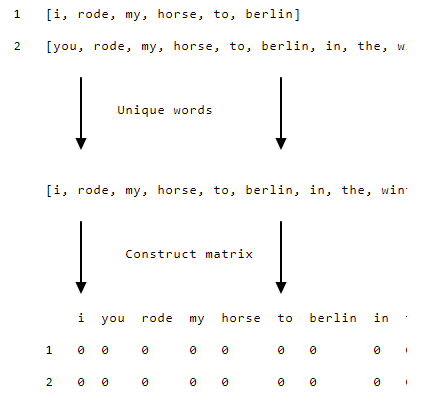

We will find all  unique tokens in 'clean_tokenized', and assign the result to 'unique_tokens'

We will only add tokens that occur more than once (across all headlines). Tokens that only occur once don't add anything to the model's prediction power, and removing them will make the algorithm run more quickly

To do this, we will keep a list of the tokens that occur once in the data, and a different list of tokens that occur more than once. If a token is already in the first list when you encounter it, and it's not in the second list, we will add it to the second list

We will also create a dataframe with as many rows as there are items in the 'clean_tokenized' list. Each column name should be a token in 'unique_tokens', and all cells will be initialised with the value 0

In [11]:
# check how to extract individual words
for tokens in clean_tokenized:
    for token in tokens:
        print(token)

software
sadly
we
did
adopt
from
the
construction
analogy
googles
stock
split
means
more
control
for
larry
and
sergey
ssl
dos
attack
tool
released
exploiting
negotiation
overhead
immutability
and
blocks
lambdas
and
closures
comment
optimiser
la
vitesse
de
wordpress
ilk
is
not
as
good
for
you
as
you
think
worldometers

real
time
world
statistics
icrosoft
strikes
back
introduces
docs
for
facebook
net
http
status
codes
anecdata
or
how
mckinseys
story
became
sheryl
sandbergs
fact
immigration
overhaul
passes
in
senate
what
matters
most
at
adtech
sf
2014
amazon
silk
revisited
is
the
split
cloud
browser
any
faster
dieter
rams
ten
principles
of
good
design
gmail
down
show
how
dont
tell
what

a
management
style
us
releases
images
said
to
implicate
russia
realtime
ocrtranslation
of
chinese
text
through
iphone
video
camera
des
dcorations
de
nol
plus
colos
childish
behaviour
silicon
valley
shouldnt
fear
china
atlantic
monthly
writer
says
mirillis
action
1330
older
entrepreneurs
find
new
niche
in
s

too
much
information
kill
creativity
nithyananda
breaking
records
on
tweets
how
jonathans
card
really
works
“delightful”
interaction
design
needs
to
die
show
hn
swing
copters
in
html5
how
mastercard
helps
retailers
understand
their
consumers
kenny
kellogg
six
links
on
saturday
hd
mars
curiosity
landing
ftc
asked
to
investigate
kids
and
inapp
purchases
pintar
habitacion
cloud
idea
using
gridgain
get
vc
funded
in
90
days
how
to
examine
active
and
hover
in
firebug
hellojs
–
clientside
oauth
for
js
all
your
tabs
accessible
everywhere
top
25
1
methods
to
enhance
your
link
building
strategy
android
40
aka
ice
cream
sandwich
update
now
rolling
out
andr
cassagnes
etchasketch
inventor
has
died
iphone
app
dev
with
titanium
getting
started
free
idea
code
equivalent
to
morning
pages750
words
overcome
your
fear
of
marketing
to
get
what
you
want
show
hn
git
flow
for
selective
feature
deployment
f#
tshirt
app
from
xamarin
how
to
correct
an
essay
paa
lashes
out
against
rogue
cyberlockers
how
the
mac
n

your
office
fridge
its
available
in
oakland
linux
ice
maker
and
vending
machine
cool
app
for
selling
digital
products
why
i
stopped
using
the
phrase
this
is
not
rocket
science
how
to
install
vmware
workstation
on
linux
and
create
virtual
machine
hibari
design
philosophy
aking
a
beautiful
modern
website

tutorial
series
copyright
office
fails
to
protect
users
from
dmca
can
you
get
treatment
for
your
internet
addiction
the
worst
act
of
terrorism
in
san
francisco
history
less
consumption
more
production
android
ice
cream
sandwich
features
a
list
of
interesting
erlang
links
what
is
our
intent
diablo
3
free

must
be
at
least
13
yrs
of
age
how
aaron
brown
a
fake
person
was
created
for
real
on
the
deep
web
ibm
chip
senses
events
to
react
like
brain
nanopond
artificial
life
vm
creating
dynamic
volumes
with
loop
devices
cloudgridjs
by
pinterest
ongodb
adds
atomic
find
and
modify
the
secret
to
online
safety
lies
random
characters
and
a
password
manager
hype
up
weekend

a
vaporware
hackathon
ailc

statement
delta
wildlife
investing
in
the
future
of
our
wildlife
resources
will
digital
networks
ruin
us
icrosoft
looks
to
social
networking
for
zune
20
villagevines
10000
members
in
just
2
months
show
hn
add
inline
article
summaries
to
hacker
news
hackmit
2013
pocket
c
it
still
needs
work
what
do
you
guys
think
spyware
used
by
governments
poses
as
firefox
and
mozilla
is
angry
wheretogetit
raises
€14
million
to
build
the
jelly
for
fashion
the
lean
love
life

apply
lean
business
principles
to
your
relationship
startup
puts
youtubers
at
its
center
and
that
changes
everything
data
mining
for
political
astroturfers
braintag
storm
the
celebrity
studio
and
retake
the
universe
critical
vulnerability
in
joomla
virtuemart
extension
egaupload
drops
lawsuit
against
universal
music
over
viral
video
bayesian
analysis
of
epidemics

zombies
influenza
and
other
diseases
blackberry
to
ask
regulators
to
probe
report
on
returns
108
billion
smartphones
in
the
world
apple
tells
investors
that
steve
jobs
pl

on
colocation
server
and
colocation
hosting
giuliano
fujiwara
women
fallwinter
201112
tokyo
jiro
ono
and
rené
redzepi
have
a
cup
of
tea
[video]
ap
fearful
russian
lawmaker
flees
to
us
weaving
peace
for
mindanao
to
tool
or
not
to
tool
david
foster
wallace
postmodern
writer
is
found
dead
at
home
emacs
now
has
multitty
in
cvs
head
youtube

horrific
dust
storm
of
decade
spikes
valley
fever
az
raw
video
ark
cubans
amazon
book
recommendations
a
cocoa
library
to
extend
the
objectivec
programming
language
nexus
oneverizon
support
coming
beano
brand
guidelines
designed
by
wayne
hemingway
google
diversity
statistics
google
cardboard
–
inexpensive
vr
headset
will
youtubes
comment
jerks
willingly
out
themselves
not
bloody
likely
3
resources
for
web
designers
banning
the
word
difficult
siblyback
lake
walking
route
imf
cuts
us
growth
forecast
warns
of
crisis
the
mirror
man
warren
spector
wants
game
designers
to
work
on
noncombat
ai
us
marine
arrested
for
facebook
posts
how
i
started
betalist
house
o

draft
10
sonsuz
sevgi
3
hiring
mistakes
that
i
made
early
on
the
rise
of
the
robots
ios
7
and
change
how
mark
zuckerberg
and
facebook
gave
new
life
to
an
old
management
style
selfdiscipline
how
to
get
in
on
a
multibillion
market
with
big
data
voodoo
carrier
iq
detector
application
released
for
android
twitter
users
most
followed
by
readers
of
hacker
news
google
acquires
waze
gow
iscow
certifcates
webshop
richfaces
450beta2
release
announcement
xy
combinator
simple
ios
activity
indicator
view
thomsonreuters
twitter
feed
is
latest
victim
of
syrian
hackers
it
scratch
–
teach
kids
to
program
stories
games
and
animations
ars
may
get
hit
by
a
comet
in
2014
bad
astronomer
show
hn
cmods
–
a
headeronly
c
modules
library
you
dont
disrupt
hollywood
you
join
it
ore
about
google
drive
how
twitter
google
docs
helped
mumbaikars
during
#mumbairain
how
apple
dodged
a
sun
buyout
you
dont
need
antimalware
on
windows
8
simple
linear
regression
with
php
[2003]
discuss
naruto
shippuden
235

tailedfox
guilt


stemming
algorithm
ruby
api
client
for
readability
service
googles
data
center
engineer
shares
secrets
of
‘warehouse
computing
nasa
wants
your
ideas
for
digitizing
rocket
scientists
notes
startapp
hits
15b
downloads
10x
growth
in
18
months
what
plagiarism
looks
like
how
to
speed
up
safari
octopus
walks
on
land
at
fitzgerald
marine
reserve
video
icrosoft
update
forces
minimum
certificate
key
length
of
1024
bits
100
million
years
old
crocodile
fossil
the
mayo
clinics
new
doctorinaniphone
what
it
really
means
to
be
a
junior
developer
show
hn
dont
let
me
get
hangry
the
daily
show
discusses
the
facebook
hoopla
dont
distract
new
programmers
with
oop
loopt
yc
s05
to
get
pushy
with
big
flash
deals
at
sxsw
an
hour
a
day
announcing
omniauth
flexible
unassuming
multiprovider
authentication
for
rack
david
lloyd
illustrator
of
v
for
vendetta
talks
about
that
now
infamous
mask
its
lisp
loop
macro
horrorshow
1981
old
dijkstra
essays
considered
sometimes
whats
normal
is
pretty
absurd
choctop

packagin

and
features
go
after
what
you
want
you
are
so
worth
it
tips
that
could
save
your
relationship
check
it
out
now
how
to
do
a
centos
60
network
installation
over
http
founders
fund
on
bloomberg
west
the
importance
of
strategy
selling
your
textbooks
vision
security
heres
how
we
blow
up
the
“good
enough”
internet
that
everyone
secretly
hates
the
superlux
super
max
the
process
of
software
development

a
ridiculously
expensive
remotecontrolled
car
thats
powered
by
a
rubber
band
community
building
tips
before
opening
a
space
google
and
ranking
result
accuracy
montreal
coding
bootcamp
–
half
as
much
$
as
us
bootcamps
apple
stock
drops
to
under
$400
no
longer
most
valuable
company
how
i
became
a
member
of
the
ny
tech
community
objectived
–
alternative
or
supplement
to
objectivec
ptc
acquires
internet
of
things
firm
for
up
to
$130m
knuth
awarded
the
bbva
foundation
frontiers
of
knowledge
award
ask
hn
20
postings
in
20
minutes
of
hn
is
this
considered
spam

archaeologists
find
door
to
the
afterli

excludes
itunes
music
from
$100
iphone
credit
the
microsoftandroid
war
which
patents
are
at
stake
curta
mechanical
calculator
how
to
effectively
dump
a
drupal
database
holodesk

another
amazing
microsoft
project
that
will
never
see
light
of
day
ltv
maximizing
value
for
money
test
tube
burger
unveiled
at
public
tasting


strange
reality
shaker
wins
techcrunch
disrupt
romney
wins
the
debate
social
report
by
sysomos
linux
2629
released
gm
opens
developer
portal
ahead
of
4g
car
launch
neat
little
feature
with
rubys
time
object
hack
my
google
glass
securitys
next
big
worry
show
hn
a
community
for
debates
surrounding
coding
and
the
web
what
if
flickr
fails
remote
book
cover
design
followup
the
roman
army
knife
or
swiss
beaten
by
1800
years
softbank
and
sequoia
invest
$100m
in
indonesian
ecommerce
startup
tokopedia
xstretch
vs
x2
recovery

mobility
cheap
cycling
jersey
disneys
touch
gesture
for
the
real
world
the
openness
elixir
how
mailchimp
learned
to
treat
data
like
orange
juice
how
not
to

nonsense
21stcentury
origami
printed
autism
articles
the
benefits
of
animal
therapy
for
autism
new
ruling
will
impact
software
licensing
agreements
helping
others
update
their
own
website
as
a
tech
savvy
individual
let
venture
capital
come
to
you
ruby
delegaterb
secrets
galaxy
nexus
data
beats
math
ultidimensional
querying
–
parse
javascript
sdk
stop
stressing
out
against
your
startup
competitors
one
div
–
the
single
element
htmlcss
icon
database
iami
vs
kansas
city
live
stream
nfl
football
cbs
fox
watch
a
drone
take
off
from
a
flying
drone
carrier
10
steps
to
planning
your
postgres
deployment
part
1
a
simple
android
app
to
debug
bluetooth
protocols
by
showing
incoming
raw
data
obama
wants
kids
to
make
video
games
coding
cognition
ibm
needs
apps
for
its
digital
brain
rtz
engineering
christmas
debating
financial
speculation
with
speculators
arketplaces
enforce
masterofnone
mentality
git
humiliate

to
be
used
with
caution

poor
parenting

including
overprotection

increases
bullying
risk

of
moocom
blogs
about
the
art
of
business
cards
cool
multiplayer
card
game
website
how
three
germans
are
cloning
the
web
the
changing
face
of
america
top
recommended
and
must
have
wordpress
plugins
news
swarms
of
hornets
kill
42
people
injure
hundreds
in
northwest
china
go
daddy
acquires
outrightcom
24hour
raspberry
pi
hackathon
competition
set
for
december
doom
1993
code
review
calgarys
new
mayor
politics
in
full
sentences
alternative
workflow
for
angularjs
development
ake
your
own
family
business
airpooler
refactoring
legacy
code
bases
a
form
of
madness

dive
into
html5
procrastination
and
perfectionism
haskell
for
ocaml
programmers
icrowave
oven
diagnostics
with
indian
snack
food
why
hire
dedicated
programmers
instead
of
freelancers
what
other
consultants
do
wrong
icrosoft
brings
git
support
to
its
codeplex
hosting
service
dropbox
plus
mercurial
driven
development
anyone
tried
that
glucose
tolerance
in
nonindustrial
cultures
ake
a
caffeine
necklace
with
mixee
labs
3d
printed
molecul

to
always
start
in
private
mode
security
is
hard
for
even
the
guru
schneier
qantas
keeps
a380s
grounded
over
engine
anomalies
show
hn
reactlive
study
links
brain
anatomy
academic
achievement
and
family
income
about
the
secret
to
a
better
you
day
1

know
your
purpose
analysts
oracle
vs
google
may
hurt
future
of
java
as
dev
platform
for
hardware
startups
having
a
hard
time
getting
their
devices
connected
streamline
your
crossvalidation
workflow
–
scikitlearns
pipeline
in
action
bezos
on
an
amazon
tablet
“stay
tuned”
charlie
miller
on
mac
os
x
pwn2own
and
writing
exploits
getting
hacked
is
in
your
future
founder
interview
with
steve
wozniak
how
to
convert
youtube
to
iphone
4
video
hoa
compiler
manipulating
dsls
has
never
been
easier
twitters
view
album
links
luv
and
war
at
30000
feet
she
fun
bollywood
news
fashion
deepikasaif
to
ape
katrinaranbir
the
uncanny
ux
valley
scary
statistics
when
is
rape
okay
zimo
its

cheap
seo
services
and
online
marketing
services
i
say
movie
you
say
film

ou

high
womens
shoes
experts
amateurs
algorithms

predicting
the
oscars
corona
labs
mobile
development
is
hiring
a
frameworks
engineer
jim
lees
rejection
letters
from
marvel
and
dc
healthcaregov
and
the
gulf
between
planning
and
reality
the
diddy
laugh
army
says
its
$23b
software
mind
is
not
survivable
looking
for
the
rant
will
us
landlords
see
the
light
and
entercastle
idi
jacket
to
create
music
through
motion
and
touch
invisalign
orthodontist
san
jose
ca
icrosoft
office
15
now
in
technical
preview
beta
will
be
available
in
summer
a
venture
capitalist
passes
away
peacefully
and
travel
health
apps
aim
to
keep
travelers
healthy
while
abroad
chsxyz
free
realtime
multiplayer
chess
in
your
browser
wwwgmailcom
how
teslatoyota
project
led
to
culture
clash
by
opposites
icrosofts
codeplex
foundation
names
new
exec
director
kyoto
tycoon
secure
replication
erkel
hollande
to
discuss
european
communication
network
avoiding
us
stable
solar
orbits
lagrange
points
made
easy
with
visualization
watsi
is
l

$25
firefox
phone
in
barcelona
swarmation
like
musical
chairs
for
pixels
learning
the
techniques
towards
better
essay
writing
top
crossword
solver
throws
down
geeky
challenge
illionaires
to
obama
tax
us
google
fiberwired
hacker
house
hits
airbnb
birth
of
a
robotic
arm
free
skateboards
its
the
software
not
you
best
online
animator
chris
herron
design
the
hell
brand
project
django
active
merchant
like
pluggable
payment
backends
best
computer
science
papers
of
2012
as
judged
by
google
debunking
the
paleo
diet
christina
warinner
at
tedxou
national
emergency
broadcast
system
test
reveals
multiple
failures
cnet
little
startup
infochimps
has
a
platform
for
big
data
bill
gates
on
being
the
top
1
percent
grant
peter
sundes
of
the
pirate
bay
plea
for
pardon
email
marketing
riddle
how
many
sale
emails
does
it
take
to
screw
an
inbox
uservoice
turns
4
182
peoplesec
see
a
feedback
widget

helpdesk
becomes
free
creating
a
ppc
audit
checklist
for
google
adwords
or
bing
ads
why
social
media
doesnt
matt

In [12]:
import numpy as np
unique_tokens = []
single_tokens = []
for tokens in clean_tokenized:
    for token in tokens:
        if token not in single_tokens:
            single_tokens.append(token)
            
            # if token already in single_tokens and not in unique_tokens, add it
        elif token in single_tokens and token not in unique_tokens:
            unique_tokens.append(token)

counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)), columns=unique_tokens)

In [13]:
counts

,and,for,as,you,is,the,split,good,how,what,...,frameworks,animated,walks,auctions,clouds,hammer,autonomous,vehicle,crowdsourcing,disaster
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We need to fill in the correct counts for each cell. This involves going through each set of tokens, and incrementing the column counters in the appropriate row

We will have a row vector for each headline telling us how many times each token occured in that headline

To do this, we can loop through each list of tokens in clean_tokenized, then loop through each token in the list and increment the proper cell.

In [15]:
clean_tokenized

[['software',
  'sadly',
  'we',
  'did',
  'adopt',
  'from',
  'the',
  'construction',
  'analogy'],
 ['googles',
  'stock',
  'split',
  'means',
  'more',
  'control',
  'for',
  'larry',
  'and',
  'sergey'],
 ['ssl',
  'dos',
  'attack',
  'tool',
  'released',
  'exploiting',
  'negotiation',
  'overhead'],
 ['immutability', 'and', 'blocks', 'lambdas', 'and', 'closures'],
 ['comment', 'optimiser', 'la', 'vitesse', 'de', 'wordpress'],
 ['ilk', 'is', 'not', 'as', 'good', 'for', 'you', 'as', 'you', 'think'],
 ['worldometers', '', 'real', 'time', 'world', 'statistics'],
 ['icrosoft', 'strikes', 'back', 'introduces', 'docs', 'for', 'facebook'],
 ['net', 'http', 'status', 'codes'],
 ['anecdata',
  'or',
  'how',
  'mckinseys',
  'story',
  'became',
  'sheryl',
  'sandbergs',
  'fact'],
 ['immigration', 'overhaul', 'passes', 'in', 'senate'],
 ['what', 'matters', 'most', 'at', 'adtech', 'sf', '2014'],
 ['amazon',
  'silk',
  'revisited',
  'is',
  'the',
  'split',
  'cloud',
  'brows

In [14]:
for i, item in enumerate(clean_tokenized):
    for token in item:
        # check whether the token is in unique_tokens
        # if not, it isn't a column in the dataframe, and ignore it
        if token in unique_tokens:
            
            # increment the appropriate cell by indexing the row of 'counts', 
            # then finding the right column for the token 
            # add 1 to the cell to indicate that you found the token once.
            counts.iloc[i][token] += 1

In [18]:
counts

,and,for,as,you,is,the,split,good,how,what,...,frameworks,animated,walks,auctions,clouds,hammer,autonomous,vehicle,crowdsourcing,disaster
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,1,2,2,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


We have over 2000 columns. This can make it hard for a linear regression model to make good predictions. Too many columns will cause the model to fit to noise instead of the signal in the data.

Features that occur only a few times will cause overfitting, because the model doesn't have enough information to accurately decide whether they're important. These features will probably correlate differently with upvotes in the test set and the training set.

Also, features that occur too many times can cause issues. These are words like 'and' and 'to', which occur in nearly every headline. These words don't add any information, because they don't correlate with upvotes. These types of words are called stopwords.

To reduce the number of features, and enable the linear regression model to make better predictions, we'll remove any words that occur fewer than 5 times, or more than 100 times.

In [24]:
# create 'word_counts' vector
word_counts = counts.sum(axis=0)
word_counts

and              289
for              298
as                47
you              100
is               158
the              604
split              2
good              13
how              140
what              62
                 192
of               342
de                 9
in               276
a                336
with             158
amazon            19
cloud             18
at                59
google            83
to               477
status             2
back              14
raises            12
faster             4
an                73
on               167
2014               8
out               39
show              64
                ... 
adapter            2
diversity          2
asking             3
link               2
deploying          2
plate              2
healthcare         2
term               2
gist               2
saving             2
devops             2
improved           2
practical          2
celebrate          2
thomas             2
sabo               2
club         

In [25]:
# filter the 'counts' table with words over 5, and less than 100
counts = counts.loc[:,(word_counts >= 5) & (word_counts <= 100)]

We split the data into two sets to evaluate our algorithm effectively. We'll train our algorithm on a training set, then test its performance on a test set

We will randomly select 20% of rows for the test set, and 80% for the training set

X_train and X_test contain the predictors, and y_train and y_test contain the value we're trying to predict (upvotes)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, submissions["upvotes"], test_size=0.2, random_state=1)

In [32]:
# TO TRAIN A MODEL:
# -----------------------
# X_train - 80% of all records
# y_train - 80% of records (just the 'upvotes' column)


# TO TEST A MODEL:
# -----------------------
# X_test - 20% of all records
# y_test - 20% of records (just the 'upvotes' column)


We will now train a model and make test predictions. We'll use a linear regression algorithm.

When we make predictions with a linear regression model, the model assigns coefficients to each column i.e. the model is determining which words correlate with more upvotes, and which with less. By finding these correlations, the model will be able to predict which headlines will be highly upvoted in the future.

In [34]:
from sklearn.linear_model import LinearRegression

# initialise the model
clf = LinearRegression()

# fit the training data to the model
clf.fit(X_train, y_train)

# using the trained model, make predictions for the 'upvotes' using test data
predictions = clf.predict(X_test)

In [35]:
# show a sample of predicted values for 'upvotes'
predictions[0:10]

array([ 21.76906861,  63.50497292, -16.7007237 ,  16.78665746,
        -1.97586441,  34.45580665, -44.98606068,  14.17889026,
        15.3594595 ,   4.82887218])

Now that we have predictions, we can calculate the prediction error. We will use the Mean Squared Error (MSE), which is a common error metric.

This is used to compare the 'predictions' with the actual values (y_test)

With MSE, we subtract the predictions from the actual values, square the results, and find the mean. Because the errors are squared, MSE penalizes errors further away from the actual value more than those close to the actual value

We want to use MSE because we'd like all of our predictions to be relatively close to the actual values

In [36]:
mse = sum((predictions - y_test) ** 2) / len(predictions)

In [37]:
mse

2651.145705668969

The MSE is 2651, which is a fairly large value. There's no fixed rule about what a "good" error rate is, because it depends on the problem we're solving and the error tolerance.

In [49]:
# convert the numpy array to pandas series to perform basic statistics
predictions = pd.Series(predictions)

In [50]:
predictions.describe()

count    560.000000
mean       8.274235
std       27.065610
min      -88.041809
25%       -6.276822
50%        8.086839
75%       16.437648
max      199.611344
dtype: float64

In this case, the mean number of upvotes is 8, and the standard deviation is 27. If we take the square root of our MSE to calculate error in terms of upvotes, we get 51.4. This means that our average error is 51.4 upvotes away from the true value. This is higher than the standard deviation, so our predictions are often far off-base.

We can take several steps to reduce the error and explore NLP further. Here are some ideas:

- Use the entire data set (we used samples in this mission, but could download the entire data set from the GitHub repository). Using more data will ensure the model will find more occurrences of the same features in the test and training sets, which will help the model make better predictions
- Add "meta" features like headline length and average word length
- Use a random forest, or another more powerful machine learning technique
- Explore different thresholds for removing extraneous columns